In [3]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import ImageGrid


In [4]:
images = []
labels = []

for subfolder in os.listdir('C:\\Users\\Krishang Virmani\\Desktop\\Python CB\\ADNI\\Alzheimer_s Dataset'):
    subfolder_path = os.path.join('C:\\Users\\Krishang Virmani\\Desktop\\Python CB\\ADNI\\Alzheimer_s Dataset', subfolder)
    
    for folder in os.listdir(subfolder_path):
        subfolder_path2 = os.path.join(subfolder_path, folder)
        
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)

df = pd.DataFrame({'image': images, 'label': labels})


In [5]:
df

,image,label
0,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,MildDemented
1,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,MildDemented
2,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,MildDemented
3,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,MildDemented
4,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,MildDemented
...,...,...
6395,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,VeryMildDemented
6396,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,VeryMildDemented
6397,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,VeryMildDemented
6398,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,VeryMildDemented


In [29]:
class_mapping = {
    'NonDemented': 'Cognitively normal',
    'VeryMildDemented': 'Early mild cognitive impairment',
    'MildDemented': 'Late mild cognitive impairment',
    'ModerateDemented': 'Alzheimer_s disease'
}# Rename the classes in the 'class' column
df['label'] = df['label'].map(class_mapping)

In [30]:
df

,image,label
0,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Late mild cognitive impairment
1,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Late mild cognitive impairment
2,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Late mild cognitive impairment
3,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Late mild cognitive impairment
4,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Late mild cognitive impairment
...,...,...
6395,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Early mild cognitive impairment
6396,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Early mild cognitive impairment
6397,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Early mild cognitive impairment
6398,C:\Users\Krishang Virmani\Desktop\Python CB\AD...,Early mild cognitive impairment


In [31]:
# Number of photos in each class
df['label'].value_counts()

label
Cognitively normal                 3200
Early mild cognitive impairment    2240
Late mild cognitive impairment      896
Alzheimer_s disease                  64
Name: count, dtype: int64

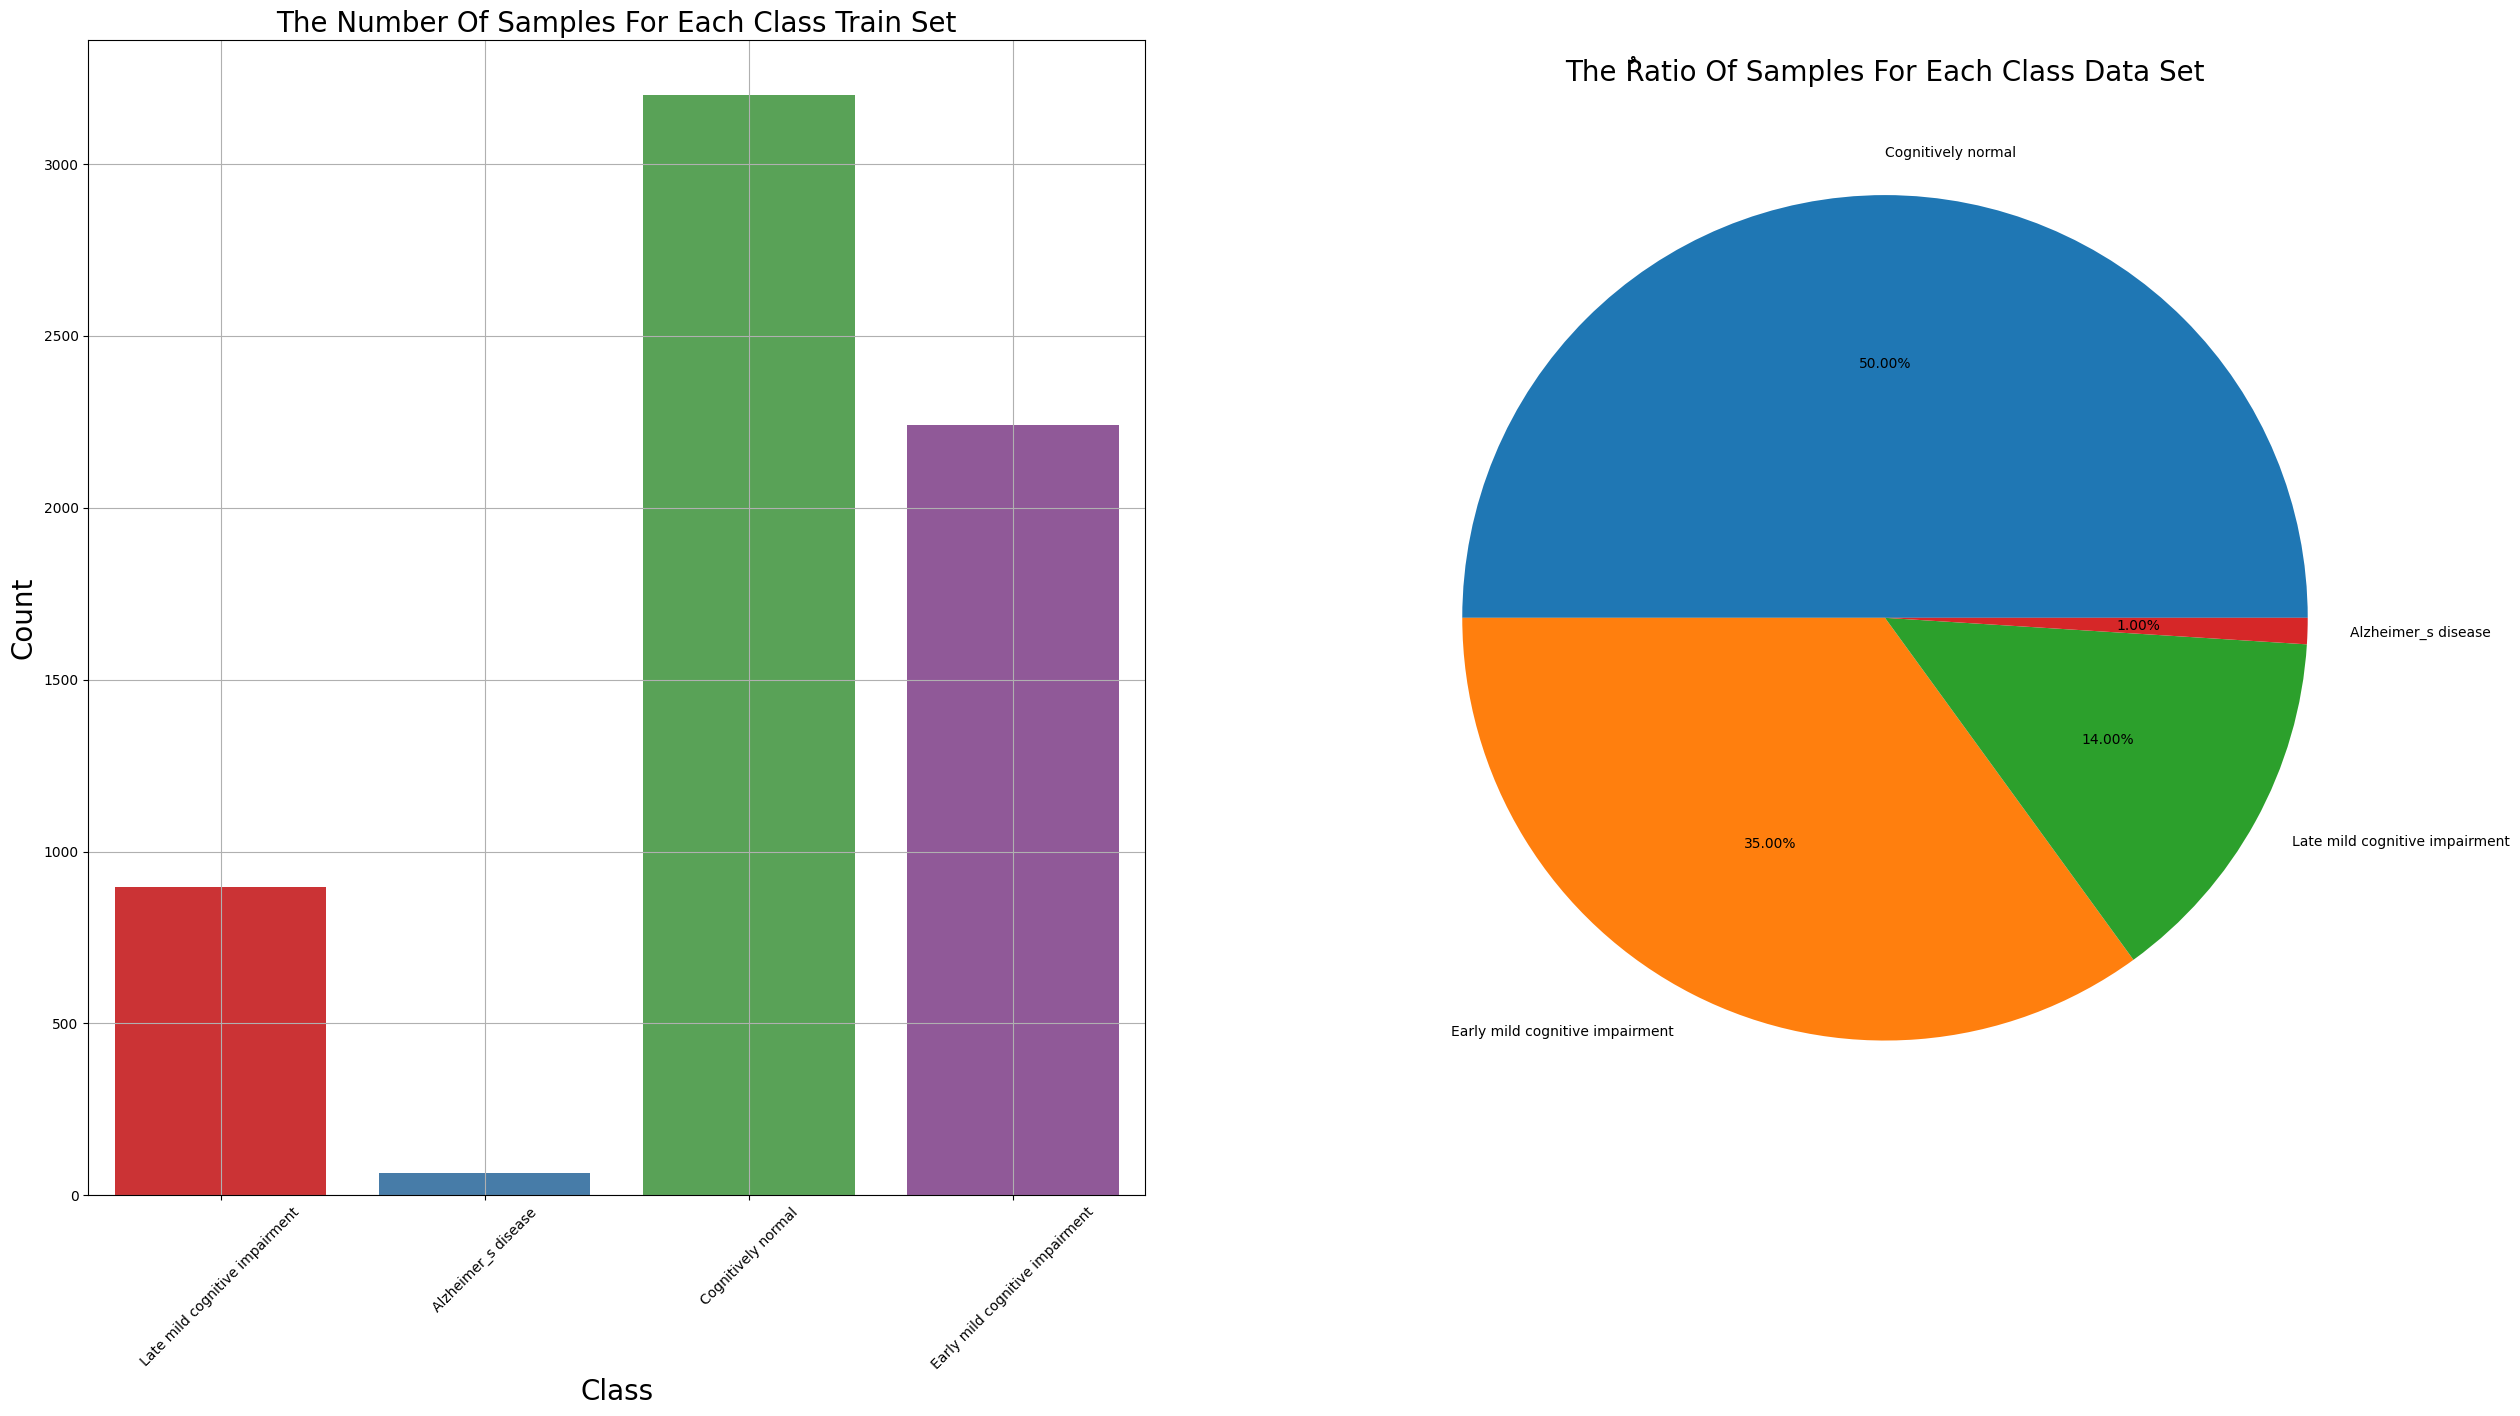

In [32]:
 #Visualizing class distribution using count plot and pie chart
plt.figure(figsize=(30, 15))

# Count Plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='label', data=df, palette='Set1',hue="label",legend=False)
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class Train Set', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(x=df['label'].value_counts(), autopct='%1.2f%%', labels=df['label'].value_counts().index, radius=1)
plt.title('The ٌRatio Of Samples For Each Class Data Set',fontsize=20)

plt.show()

In [33]:
Size=(176,176)
work_dr = ImageDataGenerator(
    rescale = 1./255
)
train_data_gen = work_dr.flow_from_dataframe(df,x_col='image',y_col='label', target_size=Size, batch_size=6500, shuffle=False)

Found 6400 validated image filenames belonging to 4 classes.


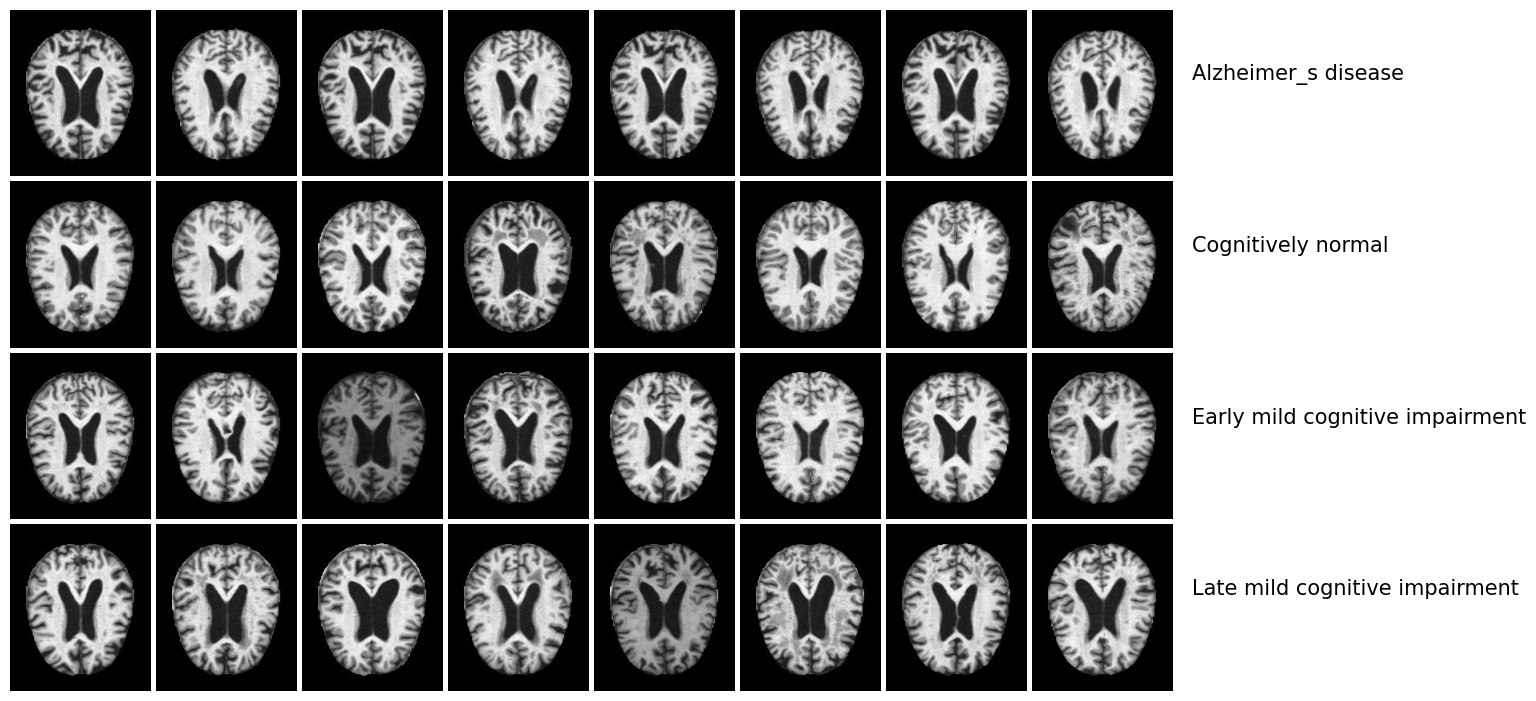

In [39]:
NUM_IMAGES_PER_CLASS = 8
NUM_CATEGORIES=4
fig = plt.figure(1, figsize=(15, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_IMAGES_PER_CLASS), axes_pad=0.05)
i = 0

for category_id, category in enumerate(class_num):
    for filepath in df['image'][df['label'] == category][:NUM_IMAGES_PER_CLASS]:
        ax = grid[i]
        img = cv2.imread(filepath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img / 255)
        ax.axis('off')
        
        if i % NUM_IMAGES_PER_CLASS == NUM_IMAGES_PER_CLASS - 1:
            ax.text(200, 80, category, verticalalignment='center', size=15)
        
        i += 1

plt.show()